In [2]:
!nvidia-smi

Fri Nov 26 13:53:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

sns.set(style="darkgrid", font_scale=1.4)

import os
from torchvision.datasets import MNIST
from torchvision import transforms as tfs

from torchsummary import summary

In [5]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])

# install for train and test
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

batch_size = 128

train_dataloader =  DataLoader(train_dataset, batch_size=batch_size, drop_last=True)
valid_dataloader =  DataLoader(val_dataset, batch_size=batch_size, drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



**Задание. Простая полносвязная нейронная сеть**

In [6]:
features = 784
classes = 10
neurons = 128

In [7]:
activation = nn.ELU

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(features, neurons),
    activation(),
    nn.Linear(neurons, neurons),
    activation(),  
    nn.Linear(neurons, classes)
)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=128, out_features=128, bias=True)
  (4): ELU(alpha=1.0)
  (5): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
summary(model, (features,), batch_size=228)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [228, 784]               0
            Linear-2                 [228, 128]         100,480
               ELU-3                 [228, 128]               0
            Linear-4                 [228, 128]          16,512
               ELU-5                 [228, 128]               0
            Linear-6                  [228, 10]           1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.68
Forward/backward pass size (MB): 2.27
Params size (MB): 0.45
Estimated Total Size (MB): 3.40
----------------------------------------------------------------


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_dataloader, "valid": valid_dataloader}
max_epochs = 10
accuracy = {"train": [], "valid": []}

**Задание. Дополните цикл обучения.**

In [11]:
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0

        for x_batch, y_batch in dataloader:

            x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
            y_batch = y_batch.to(device)

            if k == "train":
                 model.train()
                 optimizer.zero_grad()
                 outp = model(x_batch)
            else:
                 model.eval()
                 with torch.no_grad():
                    outp = model(x_batch)

            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = len(outp)
            epoch_correct += correct.item()
            epoch_all += all

            if k == "train":
                loss = criterion(outp, y_batch)
                loss.backward()
                optimizer.step()

        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)


Epoch: 1
Loader: train. Accuracy: 0.8800080128205128
Loader: valid. Accuracy: 0.9269831730769231
Epoch: 2
Loader: train. Accuracy: 0.9410556891025641
Loader: valid. Accuracy: 0.9488181089743589
Epoch: 3
Loader: train. Accuracy: 0.9580328525641025
Loader: valid. Accuracy: 0.9546274038461539
Epoch: 4
Loader: train. Accuracy: 0.9673978365384616
Loader: valid. Accuracy: 0.9607371794871795
Epoch: 5
Loader: train. Accuracy: 0.9738414797008547
Loader: valid. Accuracy: 0.9632411858974359
Epoch: 6
Loader: train. Accuracy: 0.9781650641025641
Loader: valid. Accuracy: 0.9651442307692307
Epoch: 7
Loader: train. Accuracy: 0.9811531784188035
Loader: valid. Accuracy: 0.9692508012820513
Epoch: 8
Loader: train. Accuracy: 0.9835904113247863
Loader: valid. Accuracy: 0.9700520833333334
Epoch: 9
Loader: train. Accuracy: 0.9848924946581197
Loader: valid. Accuracy: 0.9696514423076923
Epoch: 10
Loader: train. Accuracy: 0.9858607104700855
Loader: valid. Accuracy: 0.969551282051282


In [12]:
elu_accuracy = accuracy["valid"]
elu_accuracy

[0.9269831730769231,
 0.9488181089743589,
 0.9546274038461539,
 0.9607371794871795,
 0.9632411858974359,
 0.9651442307692307,
 0.9692508012820513,
 0.9700520833333334,
 0.9696514423076923,
 0.969551282051282]

**Задание. Протестируйте разные функции активации.**

In [13]:
def test_activation_function(activation):
    features = 784
    classes = 10
    neurons = 128

    model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(features, neurons),
    activation(),
    nn.Linear(neurons, neurons),
    activation(),  
    nn.Linear(neurons, classes)
    )

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    loaders = {"train": train_dataloader, "valid": valid_dataloader}
    max_epochs = 10
    accuracy = {"train": [], "valid": []}

    for epoch in range(max_epochs):
        for k, dataloader in loaders.items():
            epoch_correct = 0
            epoch_all = 0

            for x_batch, y_batch in dataloader:

                x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
                y_batch = y_batch.to(device)

                if k == "train":
                    model.train()
                    optimizer.zero_grad()
                    outp = model(x_batch)
                else:
                    model.eval()
                    with torch.no_grad():
                        outp = model(x_batch)

                preds = outp.argmax(-1)
                correct = (preds == y_batch).sum()
                all = len(outp)
                epoch_correct += correct.item()
                epoch_all += all

                if k == "train":
                    loss = criterion(outp, y_batch)
                    loss.backward()
                    optimizer.step()
            accuracy[k].append(epoch_correct/epoch_all)
            
    return accuracy["valid"]

In [14]:
class Identical(nn.Module):
    def forward(self, x):
        return x

In [15]:
plain_accuracy = test_activation_function(Identical)
relu_accuracy = test_activation_function(nn.ReLU)
leaky_relu_accuracy = test_activation_function(nn.LeakyReLU)

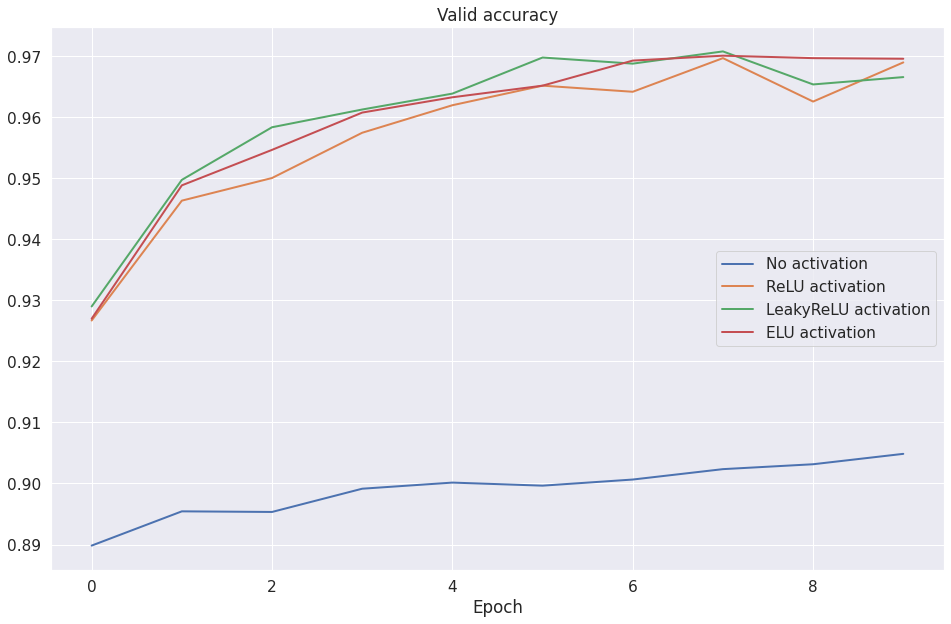

In [19]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(16, 10))
plt.title("Valid accuracy")
plt.plot(range(max_epochs), plain_accuracy, label="No activation", linewidth=2)
plt.plot(range(max_epochs), relu_accuracy, label="ReLU activation", linewidth=2)
plt.plot(range(max_epochs), leaky_relu_accuracy, label="LeakyReLU activation", linewidth=2)
plt.plot(range(max_epochs), elu_accuracy, label="ELU activation", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()

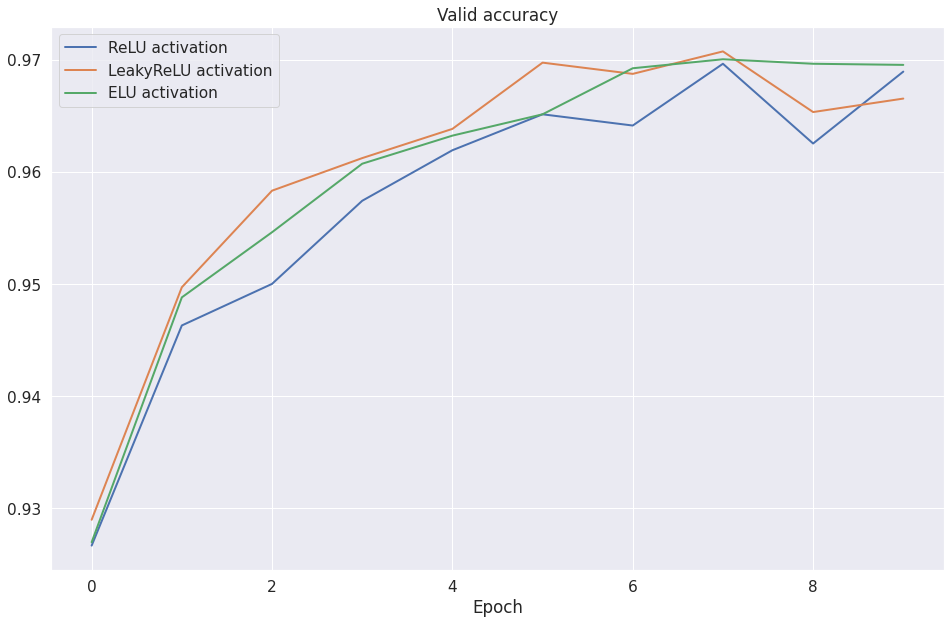

In [20]:
plt.figure(figsize=(16, 10))
plt.title("Valid accuracy")
plt.plot(range(max_epochs), relu_accuracy, label="ReLU activation", linewidth=2)
plt.plot(range(max_epochs), leaky_relu_accuracy, label="LeakyReLU activation", linewidth=2)
plt.plot(range(max_epochs), elu_accuracy, label="ELU activation", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()

**Вопрос 4.** Какая из активаций показала наивысший `accuracy` к концу обучения?

**Ответ:** ELU